In [3]:
import math
import pandas_datareader as web
import numpy as np
import pandas as pd
from sklearn.preprocessing import MinMaxScaler
from keras.models import Sequential
from keras.layers import Dense,LSTM
import matplotlib.pyplot as plt


In [4]:
df = web.DataReader('GS', data_source='yahoo', start='2012-01-01', end='2019-12-17' )
df

,High,Low,Open,Close,Volume,Adj Close
Date,,,,,,
2012-01-03,96.430000,92.830002,92.970001,95.360001,8645200.0,83.733528
2012-01-04,95.129997,93.680000,94.730003,94.739998,7406200.0,83.189133
2012-01-05,95.800003,92.500000,93.949997,94.580002,8131300.0,83.048645
2012-01-06,93.959999,92.419998,93.800003,93.419998,5940900.0,82.030060
2012-01-09,95.110001,92.959999,93.489998,94.690002,5018200.0,83.145218
...,...,...,...,...,...,...
2019-12-11,222.850006,220.839996,222.250000,221.190002,1778600.0,218.480103
2019-12-12,226.779999,220.600006,221.910004,226.050003,2974300.0,223.280548
2019-12-13,227.990005,223.699997,226.720001,225.000000,1908200.0,222.243408


In [5]:
df.shape

(2003, 6)

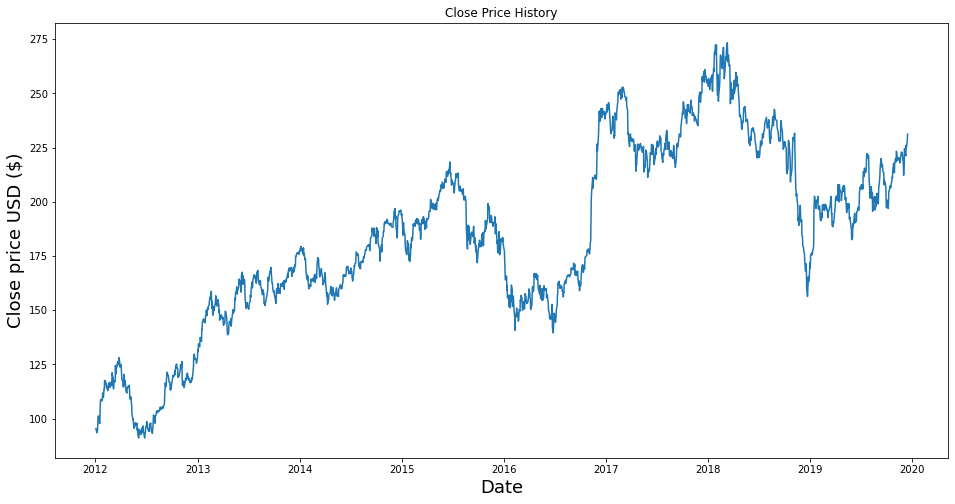

In [6]:
plt.figure(figsize=(16,8))
plt.title('Close Price History')
plt.plot(df['Close'])
plt.xlabel('Date', fontsize=18)
plt.ylabel('Close price USD ($)', fontsize=18)
plt.show()

In [7]:
data = df.filter(['Close'])
dataset = data.values

#get the number of rows to train the model on
training_data_len = math.ceil(len(dataset) * .8)

training_data_len

1603

In [8]:
#scale the data
scaler = MinMaxScaler(feature_range=(0,1))
scaled_data = scaler.fit_transform(dataset)

scaled_data

array([[0.02390613],
       [0.02050662],
       [0.01962935],
       ...,
       [0.73472967],
       [0.75139812],
       [0.76845043]])

In [9]:
#create the training dataset
from tqdm import tqdm

train_data = scaled_data[0:training_data_len, :]
x_train = []
y_train = []

for i in tqdm(range(60, len(train_data))):
  x_train.append(train_data[i-60:i, 0])
  y_train.append(train_data[i, 0])
  if i<=61 :
    print(x_train)
    print(y_train)




100%|██████████████████████████████████████████████████████████████████████████| 1543/1543 [00:00<00:00, 386838.68it/s]

[array([0.02390613, 0.02050662, 0.01962935, 0.01326899, 0.02023249,
       0.04019082, 0.04803159, 0.05598201, 0.04364513, 0.03662682,
       0.07297948, 0.0914574 , 0.09726942, 0.09425377, 0.09798225,
       0.09469238, 0.09628247, 0.11388308, 0.10269768, 0.11223819,
       0.12309462, 0.12276565, 0.1454655 , 0.14469788, 0.13696679,
       0.1378989 , 0.13641845, 0.1267683 , 0.12901633, 0.11991448,
       0.12155937, 0.13016777, 0.13658298, 0.14053074, 0.12808422,
       0.13597984, 0.13636365, 0.13833755, 0.14316263, 0.132361  ,
       0.1652045 , 0.15878933, 0.15149686, 0.1243009 , 0.13926966,
       0.1434916 , 0.14414958, 0.14250465, 0.18390174, 0.16103741,
       0.1757868 , 0.17507402, 0.18258582, 0.19201664, 0.19185216,
       0.18499834, 0.19289395, 0.20325697, 0.19371642, 0.19388091])]
[0.17962496578109133]
[array([0.02390613, 0.02050662, 0.01962935, 0.01326899, 0.02023249,
       0.04019082, 0.04803159, 0.05598201, 0.04364513, 0.03662682,
       0.07297948, 0.0914574 , 0.097

In [10]:
 x_train, y_train = np.array(x_train),np.array(y_train)

In [11]:
x_train = np.reshape(x_train, (x_train.shape[0], x_train.shape[1], 1))
x_train.shape

(1543, 60, 1)

In [12]:
#Build the LSTM Model

model = Sequential()
model.add(LSTM(50, return_sequences=True, input_shape = (x_train.shape[1],1)))
model.add(LSTM(50, return_sequences=False))

model.add(Dense(units = 1024))
model.add(Dense(units = 512))
model.add(Dense(units = 256))
model.add(Dense(units = 128))
model.add(Dense(units = 64))
model.add(Dense(1))



In [13]:
model.compile(optimizer='adam', loss='mean_squared_error')


In [14]:
model.fit(x_train,y_train, batch_size=1, epochs=100)

Epoch 1/100
1543/1543 [==============================] - 142s 92ms/step - loss: 0.0070
Epoch 2/100
1543/1543 [==============================] - 130s 85ms/step - loss: 0.0089
Epoch 3/100
1543/1543 [==============================] - 133s 86ms/step - loss: 0.0033
Epoch 4/100
1543/1543 [==============================] - 130s 84ms/step - loss: 0.0168
Epoch 5/100
1543/1543 [==============================] - 119s 77ms/step - loss: 0.0017
Epoch 6/100
1543/1543 [==============================] - 89s 58ms/step - loss: 0.0017
Epoch 7/100
1543/1543 [==============================] - 83s 54ms/step - loss: 0.0065
Epoch 8/100
1543/1543 [==============================] - 75s 49ms/step - loss: 0.0024
Epoch 9/100
1543/1543 [==============================] - 78s 51ms/step - loss: 0.0044
Epoch 10/100
1543/1543 [==============================] - 84s 54ms/step - loss: 8.3273e-04
Epoch 11/100
1543/1543 [==============================] - 74s 48ms/step - loss: 0.0017
Epoch 12/100
1543/1543 [===================

1543/1543 [==============================] - 73s 47ms/step - loss: 4.2150e-04
Epoch 91/100
1543/1543 [==============================] - 78s 51ms/step - loss: 3.1990e-04
Epoch 92/100
1543/1543 [==============================] - 72s 47ms/step - loss: 0.0018
Epoch 93/100
1543/1543 [==============================] - 78s 51ms/step - loss: 4.4930e-04
Epoch 94/100
1543/1543 [==============================] - 75s 49ms/step - loss: 4.1773e-04
Epoch 95/100
1543/1543 [==============================] - 77s 50ms/step - loss: 3.8990e-04
Epoch 96/100
1543/1543 [==============================] - 78s 50ms/step - loss: 3.5545e-04
Epoch 97/100
1543/1543 [==============================] - 76s 49ms/step - loss: 3.7806e-04
Epoch 98/100
1543/1543 [==============================] - 76s 49ms/step - loss: 9.5812e-04
Epoch 99/100
1543/1543 [==============================] - 81s 52ms/step - loss: 3.4796e-04
Epoch 100/100
1543/1543 [==============================] - 81s 52ms/step - loss: 3.9729e-04


In [15]:
#create testing dataset

test_data = scaled_data[training_data_len-60: , :]

x_test=[]
y_test = dataset[training_data_len: , :]

for i in range(60, len(test_data)):
  x_test.append(test_data[i-60:i, 0])


In [16]:
x_test = np.array(x_test)


In [17]:
x_test = np.reshape(x_test, (x_test.shape[0], x_test.shape[1], 1))

In [18]:
#get the model's predicted price values

predictions = model.predict(x_test)
predictions = scaler.inverse_transform(predictions)

In [22]:
#root mean squared error

rmse=np.sqrt(np.mean(((predictions- y_test)**2)))

rmse

3.604530186709846

c:\users\abir\appdata\local\programs\python\python37\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until


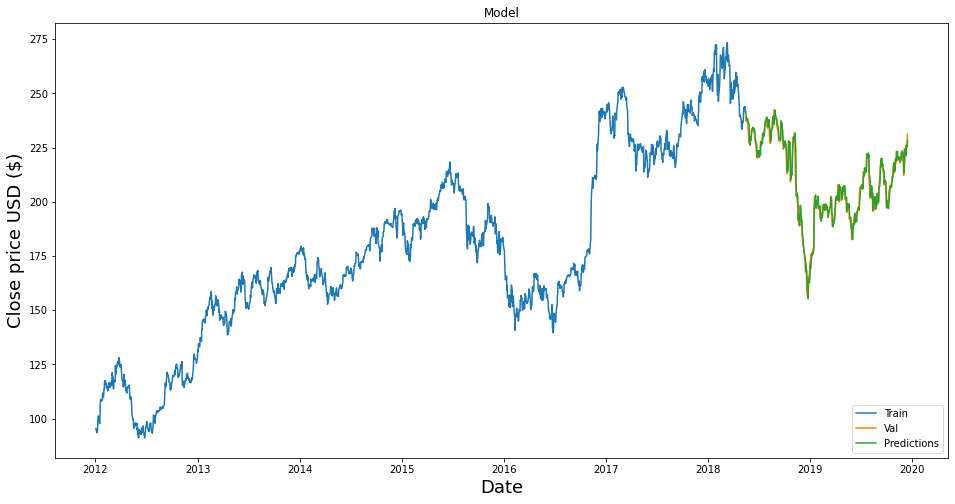

In [19]:
train = data[:training_data_len]
valid = data[training_data_len:]
valid['Predictions'] = predictions

plt.figure(figsize=(16,8))
plt.title('Model')
plt.xlabel('Date', fontsize=18)
plt.ylabel('Close price USD ($)', fontsize=18)
plt.plot(train['Close'])
plt.plot(valid[['Close', 'Predictions']])
plt.legend(['Train', 'Val', 'Predictions'], loc='lower right')
plt.show()

In [20]:
valid

,Close,Predictions
Date,,
2018-05-17,239.100006,241.553894
2018-05-18,237.000000,239.634430
2018-05-21,237.699997,237.774200
2018-05-22,238.000000,238.074997
2018-05-23,237.809998,238.244568
...,...,...
2019-12-11,221.190002,222.779053
2019-12-12,226.050003,221.508011
2019-12-13,225.000000,225.907578


In [29]:
apple_quote = web.DataReader('GS', data_source='yahoo', start='2012-01-01', end='2020-06-05')
new_df = apple_quote.filter(['Close'])
last_60_days = new_df[-60:].values
last_60_days_scaled = scaler.transform(last_60_days)

X_test = []
X_test.append(last_60_days_scaled)
X_test = np.array(X_test)
X_test = np.reshape(X_test, (X_test.shape[0], X_test.shape[1], 1))
pred_price = model.predict(X_test)
pred_price = scaler.inverse_transform(pred_price)
pred_price

array([[218.19608]], dtype=float32)

In [30]:
apple_quote2 = web.DataReader('GS', data_source='yahoo', start='2020-06-06', end='2020-06-06')
print(apple_quote2['Close'])

Date
2020-06-05    217.919998
Name: Close, dtype: float64
